# **LangChain**

LangChain is a framework for developing applications powered by language models.

- GitHub: https://github.com/hwchase17/langchain
- Docs: https://python.langchain.com/en/latest/index.html

- In simple **lagchain** if we give any query langchain uses its **own embedding** and converts to **vector and feeds to LLm**

### Overview:
- **Installation**
- **Setup the environment**
- **LLMs**  (Connct to different LLM using API_KEY via langchain)
    - Tried **OPENAI** and **HuggingFace** LLM model using API_Keys
- **Prompt Templates** (It provides template for llm prompt)
    - ***prompt template** used when we have **same template multiple time**
    - Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.
- **Chains** (Chains of prompt)
    - Combine LLMs and Prompts in multi-step workflows
    - Provided example Without Chain running one after the other
        - **5.1. Simple Sequential Chain**
            - Combine Multiple PromptTemplates
            - The output from the **first PromptTemplate is passed to the next PromptTemplate** as input
            - Only final prompt output displayed
        - **5.2. Sequential Chain**
            - Its same as **simplesequentialchain** just difference is here, we define **output_key**, so simple seq gives only last o/p , this gives both
            - If we want **all** the prompt output then use  **Sequential Chain**

- **Agents** (With the help of agents, we are accessing Tools) and Tools (Tools which we are using Serpapi,wikipedia)
    - Whenever we want **real time data** which is not there in LLM(Which trained using old data), then only we use Agents. If data is fixed then we use RAG
    - Agent will conenct with **external tools** and it will use LLM reasoning capabilities
    - All the tools like **Google Search Tool and Math Tool are available as part of LangChain and you can configure  agent, so agent is nothing but using all these tools and LLM reasoning capabilities** to perform a given task 
    - To access Google Search Results in Real Time we use **serpapi**

        - **Tool:** A function that performs a specific duty. This can be things like: Google Search, Database lookup, Python REPL, other chains.
        - **LLM:** The language model powering the agent.
        - **Agent:** The agent to use.

    - **6.1 AGENT: serpapi(Google serach) and llm-math tool**
    - **6.2 AGENT: Wikipedia and llm-math tool**
         - **Wikipedia is open source api**, so while reading this we doesn't mention any API KEY,  BUT **Serpapi** key used for  **Google search**  just **load_tool name will change from serpapi or wikipedia**
    - **6.3 AGENT: Human as a tool**
        - Here it prompts **Human**, for ans

- **Memory** (Remembering Chat History)
    - We can attach memory to remember all previous conversation
    - **Conversation chain** and **Conversation buffer memory** are same only, It keep on adds content/ q&a respnse to memory, keeps growing

    - **7.1 ConversationBufferMemory**
        - We can attach memory to remember all previous conversation
Conversation buffer memory goes growing endlessly, It takes huge space

    - **7.2 ConversationChain**

    - This is same like Conversation buffer memory, It keep on adds content/ q&a respnse to memory, keeps growing
    - It behaves like AI and human conversation


    - **7.3 ConversationBufferWindowMemory**

    - Conversation buffer memory and ConversationChain goes growing endlessly, It takes huge space
    - It  Just remember last 5 Conversation Chain based on we set parameter k=5
    - It Just remember last 10-20 Conversation Chain based on we set parameter k=10/20

- **Document Loaders** (Load our PDF file)
    - Langchain **Document Loader** converts any type(.pdf,.csv .json etc) format data and converts as **document**
    - Load the pdf file via langchain framework
    - https://python.langchain.com/docs/modules/data_connection/document_loaders/
    - By using this **Document loader** we can read any format document and then split into **chunks** and use **embedding** to convert to vector and save in **vector db** then do **retrival(RAG)** operation

- **Indexes**

## **01: Installation**
#!pip install langchain

## **02: Setup the Environment**

In [2]:
import os

### Set OPENAI_API_KEY and HUGGINGFACEHUB_API_TOKEN as environmental variable Instead of reading from .env

os.environ['OPENAI_API_KEY'] = "Type Openapi key"

os.environ["HUGGINGFACEHUB_API_TOKEN"] = "Type hugging face key "

#Or else try below method, read from .env file

In [3]:
# This is to read OPEN API KEYS from .env file which we created
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.

OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")  
print(OPENAI_API_KEY[:10])

HUGGINGFACE_TOKEN=os.getenv("HUGGINGFACEHUB_API_TOKEN")
HUGGINGFACE_TOKEN[:10]

sk-JVQrSfp


'hf_HYYUqMs'

## **03: Large Language Models**

The basic building block of LangChain is a Large Language Model which takes text as input and generates more text

Suppose we want to generate a company name based on the company description, so we will first initialize an OpenAI wrapper. In this case, since we want the output to be more random, we will intialize our model with high temprature.

The temperature parameter adjusts the randomness of the output. Higher values like 0.7 will make the output more random, while lower values like 0.2 will make it more focused and deterministic.

temperature value--> how creative we want our model to be

0 ---> temperature it means model is  very safe it is not taking any bets.

1 --> it will take risk it might generate wrong output but it is very creative

A generic interface for all LLMs. See all LLM providers: https://python.langchain.com/en/latest/modules/models/llms/integrations.html

# **Open AI**

## **Example 1**

In [4]:
#!pip install openai

#### We install openai by pip install or adding inside requirement.txt. but later will call this openai inside langchain framework

- Here OpenAI() we are not defining LLM model name, it takes default model  **gpt-3.5-turbo**
- Here OPENAPI_Key also we wont mention, it reads directly from environmetal variable, but variable name should be **OPENAI_API_KEY**

In [5]:
from langchain.llms import OpenAI
llm = OpenAI(temperature=0.9)

d:\Prabha\Data Science\Prabha-DS\Gen_AI\Ineuron\Gen_AI_Course\Project\venv\lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


And now we will pass in text and get  predictions

In [10]:
text="What would be a good company name for a company that makes colorful socks?"

> Below 4 way we can use llm model in openai, best to use **invoke** method

In [11]:
print(llm.predict(text))



"Rainbow Feet Co."


In [12]:
print(llm(text))

 "Rainbow Threads" or "Vibrant Sox Co."


In [13]:
print(llm.invoke(text))



"Rainbow Socks Co." or "Vibrant Feet Co." or "Chroma Socks" or "Spectrum Socks" or "Pop of Color Socks Co."


In [14]:
# generate --> This is to generate multiple result /5 times
response = llm.generate([text]*5)
for rest_name in response.generations:
    print(rest_name[0].text)



SockSplash Co.


1. "Bright Feet Co."
2. "Socktopia"
3. "Rainbow Socks Inc."
4. "Colorful Soles Co."
5. "Vibrant Socks Co."
6. "Funky Footwear Co."
7. "Spectrum Socks"
8. "Hue Hosiery"
9. "Chroma Socks Co."
10. "Sole Splashers"


"SockSplash" or "ChromaSocks"

"Vibrant Steps Co."


"Spectrum Socks"
"Rainbow Toes"
"Chroma Sox"
"Hue Hosiery"
"Vibrant Vessels"
"Dazzling Digits"
"Bright Feet Co."
"Pigment Peds"
"Color Pop Socks"
"Kaleidosock Co."


## **Example 2**

In [4]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)
name = llm.predict("I want to open a restaurant for Chinese food. Suggest a fency name for this.")
print(name)


"Szechuan Palace"


In [5]:
response=llm("I want to open a restaurant for Chinese food. Suggest a fency name for this.")
print(response)



"Imperial Jade Palace"


In [6]:
response = llm.invoke("I want to open a restaurant for Chinese food. Suggest a fency name for this.")
print(response)


"Golden Dragon Palace"


In [7]:
# generate --> This is to generate multiple result  /5 times
response = llm.generate(["I want to open a restaurant for Chinese food. Suggest a fency name for this."]*5)
for rest_name in response.generations:
    print(rest_name[0].text)



"Imperial Dragon Dining"
"Imperial Wok"


"Dragon's Delight" 


"The Golden Dragon Palace"

"Jasmine Palace" 


# **Hugging Face**

## **Example 1**

##### We install huggingface_hub by pip install or adding inside requirement.txt. but later will call this huggingface_hub inside langchain framework

- Here inside HuggingFaceHub(),  HUGGINGFACEHUB_API_TOKEN also we wont mention, it reads directly from environmetal variable, but variable name should be **HUGGINGFACEHUB_API_TOKEN**

In [13]:
#!pip install huggingface_hub

In [14]:
from langchain import HuggingFaceHub

In [15]:
# https://huggingface.co/google/flan-t5-xl
llm = HuggingFaceHub(repo_id="google/flan-t5-large", model_kwargs={"temperature":0, "max_length":64})

llm("translate English to German: How old are you?")

d:\Prabha\Data Science\Prabha-DS\Gen_AI\Ineuron\Gen_AI_Course\Project\venv\lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.huggingface_hub.HuggingFaceHub` was deprecated in langchain-community 0.0.21 and will be removed in 0.2.0. Use HuggingFaceEndpoint instead.
  warn_deprecated(
d:\Prabha\Data Science\Prabha-DS\Gen_AI\Ineuron\Gen_AI_Course\Project\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'Wie alte sind Sie?'

## **Example 2**

In [16]:
from langchain import HuggingFaceHub

llm = HuggingFaceHub(repo_id="google/flan-t5-large", model_kwargs={"temperature":0, "max_length":64})
name = llm.predict("I want to open a restaurant for Chinese food. Suggest a fency name for this.")
print(name)

Chinese restaurant


# **04: Prompt Templates**

- ***prompt template** used when we have **same template multiple time**
- Currently in the above applications we are writing an entire prompt, if you are creating a user directed application then this is not an ideal case

- LangChain faciliates prompt management and optimization.

- Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.

In many Large Language Model applications we donot pass the user input directly to the Large Language Model, we add the user input to a large piece of text called prompt template

## We can design PromptTemplate many way 

### **Way 1:** Example 1

In [17]:
from langchain.prompts import PromptTemplate
llm = OpenAI(temperature=0.9)

prompt = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)
p = prompt.format(cuisine="Italian")
print(p)

I want to open a restaurant for Italian food. Suggest a fency name for this.


### **Way 2:** Example 2

In [18]:
from langchain.prompts import PromptTemplate
prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")
p = prompt.format(product="colorful socks")
print(p)

What is a good name for a company that makes colorful socks


# **05: Chains**

- Combine LLMs and Prompts in multi-step workflows
## **Without Chain running one after the other**

Now as we have the  **model**:


  llm = OpenAI(temperature=0.9)


and the **Prompt Template**:

prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")


prompt.format(product="colorful socks")


Now using Chains we will link together model and the PromptTemplate and other Chains

The simplest and most common type of Chain is LLMChain, which passes the input first to Prompt Template and then to Large Language Model

LLMChain is responsible to execute the PromptTemplate, For every PromptTemplate we will specifically have an LLMChain

### **Example 1**

In [19]:
#Invoke LLM Model 
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)

In [20]:
#Create PromptTemplate
from langchain.prompts import PromptTemplate
prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")
prompt.format(product="colorful socks")

'What is a good name for a company that makes colorful socks'

Whatever input text i am giving that will get assigned to this particular variable that is **product**

In [21]:
#Pass PromptTemplate to LLM via LLMChain
from langchain.chains import LLMChain

#Define LLMChain with model name and prompt
chain = LLMChain(llm=llm, prompt=prompt)

#Execute chain by passing variable "product"'s value
response= chain.run("colorful socks")
print(response)

d:\Prabha\Data Science\Prabha-DS\Gen_AI\Ineuron\Gen_AI_Course\Project\venv\lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




"Rainbow Socks Co." 


### **Example 2**

In [22]:
#Invoke LLM Model 
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)

In [23]:
#Create PromptTemplate
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

In [24]:
#Pass PromptTemplate to LLM via LLMChain
from langchain.chains import LLMChain

#Define LLMChain with model name and prompt
chain = LLMChain(llm=llm, prompt=prompt_template_name)

#Execute chain by passing variable "product"'s value
response=chain.run("Mexican")
print(response)



"Casa de Sabores" (House of Flavors)


In [25]:
#Here verbose = True tells which step/statement executing etc. log will be displayed
chain = LLMChain(llm=llm, prompt=prompt_template_name, verbose=True)
response=chain.run("Mexican")
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
I want to open a restaurant for Mexican food. Suggest a fency name for this.



> Finished chain.


"Casa de Sabores" ("House of Flavors")


## 5.1. **Simple Sequential Chain**

- Can we combine Multiple PromptTemplates, We will try to **combine Multiple PromptTemplates**
- The output from the **first PromptTemplate is passed to the next PromptTemplate** as input
- To comine the Chain and  to set a sequence for that we use **SimpleSequentialChain**

In [26]:
llm = OpenAI(temperature=0.6)

#Individual template 1
prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

#Response from Individual template 1
name_chain =LLMChain(llm=llm, prompt=prompt_template_name)

#Individual template 2
prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="""Suggest some menu items for {restaurant_name}"""
)

#Response from Individual template 2
food_items_chain = LLMChain(llm=llm, prompt=prompt_template_items)

In [27]:
from langchain.chains import SimpleSequentialChain

#Combine Individual template 1 and Individual template 2 using SimpleSequentialChain
#Response from Individual template 1 will passed to input variable to Individual template 2
chain = SimpleSequentialChain(chains = [name_chain, food_items_chain])

#Execute chain by passing variable "cuisine"'s value
content = chain.run("udupi")  # Here we pass cuisine = 'indian' to SimpleSequentialChain 
print(content)


1. Masala Dosa - a popular South Indian dish made with crispy crepe-like dosa filled with a spicy potato filling.
2. Uttapam - a thick pancake-like dish made with a batter of rice and lentils, topped with vegetables and served with chutney and sambar.
3. Medu Vada - savory deep-fried doughnuts made with lentil batter, served with chutney and sambar.
4. Vegetable Biryani - fragrant basmati rice cooked with mixed vegetables, spices, and herbs.
5. Sambar - a flavorful lentil-based stew with vegetables, served as a side dish.
6. Rasam - a tangy and spicy tomato-based soup, served as an appetizer.
7. Ghee Roast - a dish made with marinated chicken or paneer cooked in a spicy ghee-based sauce.
8. Puri Bhaji - deep-fried puffed bread served with a spicy potato curry.
9. Rava Idli - soft and fluffy steamed semolina cakes, served with chutney and sambar.
10. Payasam - a sweet and creamy pudding made with vermicelli, milk, and sugar, served as a dessert.


### Issue in **SimpleSequentialChain**
- There is a issue with **SimpleSequentialChain** it only shows last **input information**
- To show the entire information i will use **SequentialChain**

## 5.2. **Sequential Chain**

- Its same as **simplesequentialchain** just difference is here, we define **output_key**, so simple seq gives only last o/p , this gives both
- If we want all the prompt output then use  **Sequential Chain**

In [28]:
llm = OpenAI(temperature=0.7)

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

name_chain =LLMChain(llm=llm, prompt=prompt_template_name, output_key="restaurant_name")

In [29]:
llm = OpenAI(temperature=0.7)

prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="Suggest some menu items for {restaurant_name}."
)

food_items_chain =LLMChain(llm=llm, prompt=prompt_template_items, output_key="menu_items")

In [30]:
from langchain.chains import SequentialChain

chain = SequentialChain(
    chains = [name_chain, food_items_chain],
    input_variables = ['cuisine'],
    output_variables = ['restaurant_name', "menu_items"]
)

In [31]:
#Execute chain by passing variable "cuisine"'s value. 
# here chain.run() not used to execute. It calls by below method directly
print(chain({"cuisine": "indian"}))

d:\Prabha\Data Science\Prabha-DS\Gen_AI\Ineuron\Gen_AI_Course\Project\venv\lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


{'cuisine': 'indian', 'restaurant_name': '\n\n"Taj Mahal Spice" ', 'menu_items': '\n1. Tandoori Chicken: Marinated chicken roasted in a clay oven and served with a side of mint chutney. \n2. Butter Chicken: A creamy and flavorful chicken curry made with a blend of spices and served with basmati rice. \n3. Vegetable Samosas: Crispy fried pastries filled with spiced potatoes, peas, and onions. \n4. Lamb Biryani: Fragrant basmati rice cooked with tender lamb pieces, spices, and herbs. \n5. Saag Paneer: A popular vegetarian dish made with spinach and chunks of paneer cheese in a creamy tomato-based sauce. \n6. Garlic Naan: Freshly baked flatbread brushed with garlic butter. \n7. Masala Dosa: A crispy crepe stuffed with a savory potato and vegetable filling, served with chutneys and sambar. \n8. Chicken Tikka Masala: A classic dish of chicken in a rich and spicy tomato-based sauce. \n9. Aloo Gobi: A vegetarian dish made with cauliflower and potatoes, cooked with aromatic Indian spices. \n10

# **06. Agents and Tools**

- Agents involve an LLM making decisions about which Actions to take, taking that Action, seeing an Observation, and repeating that until done.

- When used correctly agents can be extremely powerful. In order to load agents, you should understand the following concepts:

    - **Tool:** A function that performs a specific duty. This can be things like: Google Search, Database lookup, Python REPL, other chains.
    - **LLM:** The language model powering the agent.
    - **Agent:** The agent to use.


## Agent is a very powerful concept in LangChain

- For example I have to travel from Dubai to Canada, I type this in ChatGPT



---> Give me  two flight options from Dubai to Canada on September 1, 2023 | ChatGPT will not be able to answer because has knowledge till
September 2021



ChatGPT plus has Expedia Plugin, if we enable this plugin it will go to Expedia Plugin and will try to pull information about Flights & it will show the information

#**What exactly happens when we try to enable this plugin**

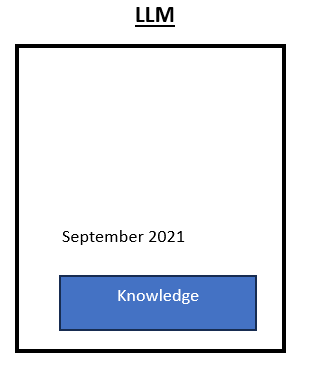


- When we think about LLM. Many people think that it is just a knowledge engine, it has knowledge and it will try to give answer based on that knowledge but the knowledge is only limited to September 2021. The think that most people missout is that Large Lanaguage Model has a reasoning engine, and using that reasoning engine it can figure out when someone types this type of Question

- Give me  two flight options from Dubai to Canada on September 1, 2023
- As a human we go to Expedia as we have a reasoning engine in our brain.

- LLM has a reasoning engine as well, so it will figure out the Source, Destination, Date and it will call Expedia Plugin and it will return response back.

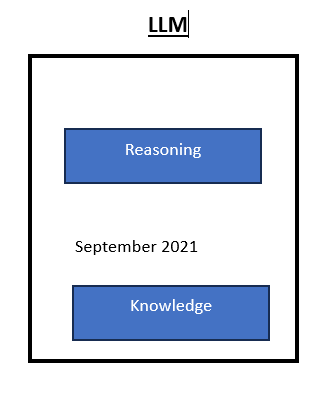

**How much is US GDP in 2022? plus 5**

- As LLM has a reasoning engine to answer that question it will go to Google Search Tool, it will find that answer and then it will use Math Tool and do plus 5

**An agent has access to a suite of tools, and determines which ones to use depending on the user input.**

#### Agent will conenct with external tools and it will use LLM reasoning capabilities

- All the tools like **Google Search Tool and Math Tool are available as part of LangChain and you can configure  agent, so agent is nothing but using all these tools and LLM reasoning capabilities** to perform a given task 

### To access Google Search Results in Real Time we use **serpapi**

## List all the different Tools in Agents

In [16]:
from langchain.agents import get_all_tool_names
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(get_all_tool_names())

[   'requests',
    'requests_get',
    'requests_post',
    'requests_patch',
    'requests_put',
    'requests_delete',
    'terminal',
    'sleep',
    'wolfram-alpha',
    'google-search',
    'google-search-results-json',
    'searx-search-results-json',
    'bing-search',
    'metaphor-search',
    'ddg-search',
    'google-lens',
    'google-serper',
    'google-scholar',
    'google-finance',
    'google-trends',
    'google-jobs',
    'google-serper-results-json',
    'searchapi',
    'searchapi-results-json',
    'serpapi',
    'dalle-image-generator',
    'twilio',
    'searx-search',
    'merriam-webster',
    'wikipedia',
    'arxiv',
    'golden-query',
    'pubmed',
    'human',
    'awslambda',
    'stackexchange',
    'sceneXplain',
    'graphql',
    'openweathermap-api',
    'dataforseo-api-search',
    'dataforseo-api-search-json',
    'eleven_labs_text2speech',
    'google_cloud_texttospeech',
    'reddit_search',
    'news-api',
    'tmdb-api',
    'podcast-api',


## 6.1 **AGENT: serpapi(Google serach) and llm-math tool**

- **SerpApi** is a **real-time API** to access Google search results.
https://serpapi.com/

- If you're using a **text LLM**, first try **zero-shot-react-description**, aka. the **MRKL agent for LLMs**.


- If you're using a **Chat Model**, try **chat-zero-shot-react-descriptio**n, aka. the **MRKL agent for Chat** Models.


- If you're using a **Chat Model and want to use memory**, try **chat-conversational-react-description**, the **Conversational agent**.


- If you have a **complex task** that requires many steps and you're interested in experimenting with a new type of agent, try the **Plan-and-Execute agent**.

In [32]:
#!pip install google-search-results
#!pip install numexpr

- **Wikipedia is open source api**, so while reading this we doesn't mention any API KEY,  BUT **Serpapi** key used for  **Google search**  just **load_tool name will change from serpapi or wikipedia**

In [33]:
import os

#os.environ['SERPAPI_API_KEY'] = 'Give SERPAPI_API_KEY'
SERPAPI_API_KEY=os.getenv("SERPAPI_API_KEY")  
print(SERPAPI_API_KEY[:5])

790f7


In [19]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.llms import OpenAI

llm = OpenAI(temperature=0)

# Here using Google Search API - serpapi
# The tools we'll give the Agent access to is llm-math
# Note that the 'llm-math' tool uses an LLM, so we need to pass that in. Which is fixed
tools = load_tools(["serpapi", "llm-math"], llm=llm)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

# Let's test it out!
agent.run("What was the GDP of US in 2023?")

ValidationError: 1 validation error for SerpAPIWrapper
__root__
  Did not find serpapi_api_key, please add an environment variable `SERPAPI_API_KEY` which contains it, or pass `serpapi_api_key` as a named parameter. (type=value_error)

## 6.2 **AGENT: Wikipedia and llm-math tool**

- **Wikipedia is open source api**, so while reading this we doesn't mention any API KEY,  BUT **Serpapi** key used for  **Google search**  just **load_tool name will change from serpapi or wikipedia**

In [20]:
# install this package: pip install wikipedia
llm = OpenAI(temperature=0)

# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["wikipedia", "llm-math"], llm=llm)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Let's test it out!
agent.run("In what year was the film Departed with Leopnardo Dicaprio released? What is this year raised to the 0.43 power?")

d:\Prabha\Data Science\Prabha-DS\Gen_AI\Ineuron\Gen_AI_Course\Project\venv\lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(
d:\Prabha\Data Science\Prabha-DS\Gen_AI\Ineuron\Gen_AI_Course\Project\venv\lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
 I should use Wikipedia to find the release year of the film and then use the Calculator to raise it to the 0.43 power.
Action: wikipedia
Action Input: Departed film

d:\Prabha\Data Science\Prabha-DS\Gen_AI\Ineuron\Gen_AI_Course\Project\venv\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file d:\Prabha\Data Science\Prabha-DS\Gen_AI\Ineuron\Gen_AI_Course\Project\venv\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: The Departed
Summary: The Departed is a 2006 American crime thriller film directed by Martin Scorsese and written by William Monahan. It is both a remake of the 2002 Hong Kong film Infernal Affairs and also loosely based on the real-life Boston Winter Hill Gang; the character Colin Sullivan is based on the corrupt FBI agent John Connolly, while the character Frank Costello is based on Irish-American gangster and crime boss Whitey Bulger. The film stars Leonardo DiCaprio, Matt Damon, Jack Nicholson, and Mark Wahlberg, with Martin Sheen, Ray Winstone, Vera Farmiga, Alec Baldwin, Anthony Anderson and James Badge Dale in supporting roles.
The film takes place in Boston and the surrounding metro area, primarily in the South Boston neighborhood. Irish Mob boss Frank Costello (Nicholson) plants Colin Sullivan (Damon) as a spy within the Massachusetts State Police; simultaneously, the police assign undercover state trooper Billy Costigan (DiCaprio) to infiltrate Costello's 

'26.30281917656938'

## 6.3 **AGENT: Human as a tool**

- Here it prompts **Human**, for ans

In [23]:
# install this package: pip install wikipedia
llm = OpenAI(temperature=0)

# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["human", "llm-math"],   llm)


# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Let's test it out!
agent.run("Who born in Uppinakudru")



> Entering new AgentExecutor chain...
 I should ask a human for guidance
Action: human
Action Input: Who born in Uppinakudru

Who born in Uppinakudru

Observation: Prabha
Thought: I now know the final answer
Final Answer: Prabha

> Finished chain.


'Prabha'

# **07: Memory**

- Chatbot application like ChatGPT, you will notice that it remember past information
- **Conversation chain** and **Conversation buffer memory** are same only, It keep on adds content/ q&a respnse to memory, keeps growing

In [36]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)

In [37]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

In [38]:
#Create chain
from langchain.chains import LLMChain

chain = LLMChain(llm=llm,prompt=prompt_template_name)

#1st execution
name = chain.run("Mexican")
print(name)


"Casa de Sabor" 


In [39]:
#2nd execution
name = chain.run("Indian")
print(name)



"Masala Mansion" 


In [40]:
chain.memory

In [41]:
type(chain.memory)

NoneType

> If we notice above, it not able to remember previous query or response

## 7.1 **ConversationBufferMemory**
We can attach memory to remember all previous conversation

In [42]:
from langchain.memory import ConversationBufferMemory

# Adding ConversationBufferMemory
memory = ConversationBufferMemory()

chain = LLMChain(llm=llm, prompt=prompt_template_name, memory=memory) # Adding memory in chain
#1st execution
name = chain.run("Mexican")
print(name)



"La Fiesta de Sabores" 


In [43]:
#2nd execution
name = chain.run("Arabic")
print(name)



"Al-Farah Palace"


In [44]:
#Check memory
print(chain.memory.buffer)

Human: Mexican
AI: 

"La Fiesta de Sabores" 
Human: Arabic
AI: 

"Al-Farah Palace"



- Conversation buffer memory goes growing endlessly, It takes huge space

## 7.2 **ConversationChain**

- This is same like **Conversation buffer memory**, It keep on adds content/ q&a respnse to memory, keeps growing
- It behaves like AI and human conversation

In [45]:
from langchain.chains import ConversationChain

#Define Conversationchain, It behaves like AI and human conversation
convo = ConversationChain(llm=OpenAI(temperature=0.7))
print(convo.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


In [46]:
convo.run("Who won the first cricket world cup?")

" The first cricket world cup was held in 1975 and was won by the West Indies team. The final match was played at Lord's Cricket Ground in London, England and the West Indies defeated Australia by 17 runs. It was a historic moment for both teams as it was the first ever cricket world cup and the West Indies became the first ever champions."

In [47]:
convo.run("How much is 5+5?")

' The answer to 5+5 is 10.'

In [48]:
convo.run("Who was the captain ofthe winning team?")

" The captain of the winning West Indies team was Clive Lloyd. He was a legendary cricketer who led his team to victory in the first two cricket world cups in 1975 and 1979. He was known for his powerful batting and strategic captaincy, making him a key player in the team's success."

In [49]:
print(convo.memory.buffer)

Human: Who won the first cricket world cup?
AI:  The first cricket world cup was held in 1975 and was won by the West Indies team. The final match was played at Lord's Cricket Ground in London, England and the West Indies defeated Australia by 17 runs. It was a historic moment for both teams as it was the first ever cricket world cup and the West Indies became the first ever champions.
Human: How much is 5+5?
AI:  The answer to 5+5 is 10.
Human: Who was the captain ofthe winning team?
AI:  The captain of the winning West Indies team was Clive Lloyd. He was a legendary cricketer who led his team to victory in the first two cricket world cups in 1975 and 1979. He was known for his powerful batting and strategic captaincy, making him a key player in the team's success.


## 7.3 **ConversationBufferWindowMemory**

- Conversation buffer memory and ConversationChain goes growing endlessly, It takes huge space

- It  Just remember last 5 Conversation Chain based on we set parameter k=5

- It Just remember last 10-20 Conversation Chain based on we set parameter k=5
 

In [50]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=1)

convo = ConversationChain(
    llm=OpenAI(temperature=0.7),
    memory=memory
)
convo.run("Who won the first cricket world cup?")

' The first cricket world cup was won by the West Indies in 1975.'

In [51]:
convo.run("How much is 5+5?")

'  5+5 is equal to 10.'

In [52]:
convo.run("Who was the captain of the winning team?")

' I am not sure which specific team you are referring to. Do you have any more context or information?'

In [53]:
print(convo.memory.buffer)

Human: Who was the captain of the winning team?
AI:  I am not sure which specific team you are referring to. Do you have any more context or information?


In [54]:
#ConversationBufferWindowMemory(k=3)  --> Remember last 3 conversation
memory = ConversationBufferWindowMemory(k=3)

convo = ConversationChain(
    llm=OpenAI(temperature=0.7),
    memory=memory
)
convo.run("Who won the first cricket world cup?")

' The first cricket world cup was won by the West Indies team in 1975. It was held in England and the final match was played between the West Indies and Australia. The West Indies won by 17 runs.'

In [55]:
convo.run("How much is 10+10?")

'  The answer to 10+10 is 20. This is because 10 plus 10 equals 20. It is a simple arithmetic equation that can be easily solved. Is there anything else you would like to know?'

In [56]:
convo.run("Who was the captain of the winning team?")

' The captain of the West Indies team during the first cricket world cup was Clive Lloyd. He was a skilled batsman and led his team to victory with his strong leadership and strategic decisions. He also went on to captain the West Indies team in the next two world cups, winning both of them as well.'

In [57]:
convo.run("Who was the captain of the Loosing team?")

'  The captain of the losing team, Australia, during the first cricket world cup was Ian Chappell. He was a talented batsman and captain, but unfortunately his team fell short in the final match against the West Indies. However, he went on to captain Australia in later years and achieved great success in the cricket world.'

In [58]:
print(convo.memory.buffer)

Human: How much is 10+10?
AI:   The answer to 10+10 is 20. This is because 10 plus 10 equals 20. It is a simple arithmetic equation that can be easily solved. Is there anything else you would like to know?
Human: Who was the captain of the winning team?
AI:  The captain of the West Indies team during the first cricket world cup was Clive Lloyd. He was a skilled batsman and led his team to victory with his strong leadership and strategic decisions. He also went on to captain the West Indies team in the next two world cups, winning both of them as well.
Human: Who was the captain of the Loosing team?
AI:   The captain of the losing team, Australia, during the first cricket world cup was Ian Chappell. He was a talented batsman and captain, but unfortunately his team fell short in the final match against the West Indies. However, he went on to captain Australia in later years and achieved great success in the cricket world.


# **08: Document Loaders**

- Langchain **Document Loader** converts any type(.pdf,.csv .json etc) format data and converts as **document**
- Load the pdf file via langchain framework
- https://python.langchain.com/docs/modules/data_connection/document_loaders/
- By using this **Document loader** we can read any format document and then split into **chunks** and use **embedding** to convert to vector and save in **vector db** then do **retrival(RAG)** operation

In [59]:
#!pip install pypdf

In [60]:
# .pdf file Loader
from langchain.document_loaders import PyPDFLoader

#loader = PyPDFLoader("/content/my_paper.pdf")
loader = PyPDFLoader("./Resume_Prabha.pdf")
pages = loader.load()
pages

[Document(page_content='1PrabhavathiBharadwaj\nBlock490A,#09-211 EmailId:prabhavathi.melady@gmail.com\nTampinesSt45 ContactNo:+65-91346483\nSingapore-520490 CertifiedDataScienceProfessional(Edureka)\nhttps://github.com/PrabhaBharadwaj\nObjective:\nTobeassociatedwithaprogressiveorganization,dynamicteamthatgivesanopportunityto\napplymyknowledge,analyticalskillsandcontributetowardsbuildingdatadrivenorganization.\nSummary:\n\uf0b7DataScienceEnthusiastwhocanunderstandthedriversofbusinessresultsandhow\ndata/analyticscanacceleratetheoutcomes.\n\uf0b7DataAnalystandETLdeveloperwithover8+yearsofexperience(excludingMaternitybreak)in\nthefieldofDatawarehouse.ExperiencedinBanking,SupplyChainManagementandRetail\nManagementdomains.\n\uf0b7ProficientinSQL,TeradataandworkingexperienceinPython(basics,pandas,numpy),Pyspark,\nvisualizationtools(i.eh.matplotlib,seaborn)andstatisticsconcepts.\n\uf0b7GoodunderstandingonMachineLearning(ML)Supervisedlearning,Unsupervisedlearningand\nReinforcementLearningandapp

In [61]:
# .md file Loader
from langchain_community.document_loaders import TextLoader

loader = TextLoader("./README.md")
pages = loader.load()
pages

[Document(page_content='# Basic Langchain Code\n\nLangChain is a framework for developing applications powered by language models.\n\n- GitHub: https://github.com/hwchase17/langchain\n- Docs: https://python.langchain.com/en/latest/index.html\n\n- Holds Calling OpenAI API, HuggingFace API, Gemini(Google) API Connection examples from **Langchain**\n\n### Overview:\n\n- **Installation**\n- **Setup the environment**\n- **LLMs** (Connct to different LLM using API_KEY via langchain)\n  - Tried **OPENAI** and **HuggingFace** LLM model using API_Keys\n- **Prompt Templates** (It provides template for llm prompt)\n  - Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.\n- **Chains** (Chains of prompt)\n\n  - Combine LLMs and Prompts in multi-step workflows\n  - Provided example Without Chain running one after the other\n    - **5.1. Simple Sequentia

> This pdf data we will convert to vector using vectorDB in future class

# **END**